# The Gaussian (Normal) Distribution

## Probability Distribution Function

The Normal (Gaussian) distribution probability distribution function is

\begin{equation}
f\left(x; \mu, \sigma\right) = \frac{1}{\sqrt{2\pi}\sigma}\,e^{-\left(x-\mu\right)^2/2\sigma^2},
\end{equation}

normalized to unity,
$$
\int\limits_{-\infty}^{\infty} f\left(x; \mu,\sigma\right)\,dx = 1,
$$
is symmetrically distributed about its mean, $\mu$, with width $\sigma$.

## Full Width at Half Maximum (FWHM)

The full width at half maximum (FWHM) is the distance between points on a curve at which the function reaches half its maximum value. The FWHM is often used to describe the "width" of a distribution.

For a 1-dimensional Gaussian, it is seen that as the maximum value occurs as $x = \mu$ (by definition), half of the maximum value is

\begin{align*}
\left.\frac{1}{\sqrt{2\pi}\sigma}\,e^{-\left(x-\mu\right)^2/2\sigma^2}\right|_{x = x \text{ of (max/2)}} &= \frac{1}{2} f\left(x_{\text{max}}\right)\\
    &= \frac{1}{2} f\left(\mu\right) = \frac{1}{2} \frac{1}{\sqrt{2\pi}\sigma},
\end{align*}

resulting in the equality

\begin{equation*}
e^{-\left(x-\mu\right)^2/2\sigma^2} = \frac{1}{2},
\end{equation*}

which is (taking the log)

\begin{equation*}
-\frac{\left(x-\mu\right)^2}{2\sigma^2} = -\ln2.
\end{equation*}

Thus, solving the equality,
$$
\left(x-\mu\right)^2 = 2\sigma^2 \ln2,
$$
yields
$$
x_{\pm} = \pm \sigma \sqrt{2 \ln 2} + \mu.
$$

Thus, the FWHM is

\begin{align*}
\text{FWHM} &= x_{+} - x_{-}\\
    &= \left(\sigma \sqrt{2 \ln 2} + \mu\right) - \left(-\sigma \sqrt{2 \ln 2} + \mu\right)\\
    &= \boxed{2\sqrt{2\ln2}\sigma}\,.
\end{align*}

**N.B.:** It is seen that the FWHM for a Gaussian is _independent_ of both the normalization constant and the mean, and is only dependent on the standard devaiation of the Gaussian.

## Probability and the Error Function

The probability that a Normally distributed random variable will lie in a range of values symmetrically integrated over is given by

\begin{align*}
\text{Pr}\left(\mu - y \leq x \leq \mu + y\right) &= \int\limits_{\mu - y}^{\mu + y}\frac{1}{\sqrt{2\pi}\sigma}\,e^{-\left(x-\mu\right)^2/2\sigma^2}\,dx\\
    &= \int\limits_{\mu}^{\mu + y}\frac{2}{\sqrt{2\pi}\sigma}\,e^{-\left(x-\mu\right)^2/2\sigma^2}\,dx.
\end{align*}

Making the substitution
$$
t = \frac{\left(x-\mu\right)}{\sqrt{2}\sigma},
$$
then

\begin{align*}
\text{Pr}\left(\mu - y \leq x \leq \mu + y\right) &= \int\limits_{\mu}^{\mu + y}\frac{2}{\sqrt{2\pi}\sigma}\,e^{-\left(x-\mu\right)^2/2\sigma^2}\,dx\\
    &= \boxed{\frac{2}{\sqrt{\pi}} \int\limits_{0}^{y/\sqrt{2}\sigma}e^{-t^2}\,dt \equiv \text{erf}\left(\frac{y}{\sqrt{2}\sigma}\right)}\,.
\end{align*}

## Cumulative Distribution Function (cdf)

For the cumulative distribution function (cdf),
$$
\Phi\left(x\right) = \int\limits_{-\infty}^{x}f\left(t;\mu,\sigma\right)\,dt,
$$
it is seen, noting from the form of the error function, that

\begin{equation*}
\frac{2}{\sqrt{\pi}} \int\limits_{0}^{y/\sqrt{2}\sigma}e^{-t^2}\,dt = \frac{2}{\sqrt{2 \pi}} \int\limits_{0}^{y/\sigma}e^{-t^2/2}\,dt = \text{erf}\left(\frac{y}{\sqrt{2}\sigma}\right),
\end{equation*}

In [1]:
import sympy as sym

sym.init_printing(use_unicode=True, wrap_line=False, no_global=True)
from sympy.abc import sigma

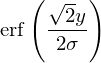

In [2]:
(
    t,
    y,
) = sym.symbols("t y")
sym.integrate(
    (2 / sym.sqrt(sym.pi)) * sym.exp(-(t ** 2)), (t, 0, y / (sym.sqrt(2) * sigma))
)

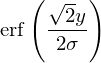

In [3]:
sym.integrate((2 / sym.sqrt(2 * sym.pi)) * sym.exp(-(t ** 2) / 2), (t, 0, y / sigma))

then for the standard Gaussian ($\mu = 0$, $\sigma=1$)

\begin{align*}
\Phi\left(x\right) &= \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x} e^{-t^2/2}\,dt\\
    &= \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{0} e^{-t^2/2}\,dt + \frac{1}{\sqrt{2\pi}}\int\limits_{0}^{x} e^{-t^2/2}\,dt\\
    &= \frac{1}{2} + \frac{1}{2} \text{erf}\left(\frac{x}{\sqrt{2}}\right)\\
    &= \frac{1}{2} \left(1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right)
\end{align*}

so it is likewise seen that

\begin{align*}
\text{Pr}\left(\mu - n \sigma \leq x \leq \mu + n\sigma\right) &= \Phi(n) - \Phi(-n)\\
    &= \Phi(n) - \left(1-\Phi(n)\right)\\
    &= \frac{1}{2} \left(1 + \text{erf}\left(\frac{n}{\sqrt{2}}\right)\right) - \left[1-\frac{1}{2} \left(1 + \text{erf}\left(\frac{n}{\sqrt{2}}\right)\right)\right]\\
    &= \text{erf}\left(\frac{n}{\sqrt{2}}\right).
\end{align*}

**Show this for:** generic normal distribution $f$ with mean $\mu$ and std $\sigma$

It is noted that in the case that $\left|y\right|=n\sigma$,
$$
\text{Pr}\left(\mu - y \leq x \leq \mu + y\right) = \text{Pr}\left(\mu - n\sigma \leq x \leq \mu + n\sigma\right) = \text{erf}\left(\frac{n}{\sqrt{2}}\right).
$$

So, for $n=1$,
$$
\text{Pr}\left(\mu - \sigma \leq x \leq \mu + \sigma\right) = \text{erf}\left(\frac{1}{\sqrt{2}}\right)
$$

However, at this point we are at an impass analytically, as the integral of a Gaussian function over a finite range has no analytical solution, and must be evaluated numerically.

In [4]:
import math
from scipy import special as special

In [5]:
def prob_n_sigma(n):
    return special.erf(n / math.sqrt(2.0))

In [6]:
prob_n_sigma(1)

## $p$-values

### Two-Tailed  $p$-value

### One-Tailed  $p$-value